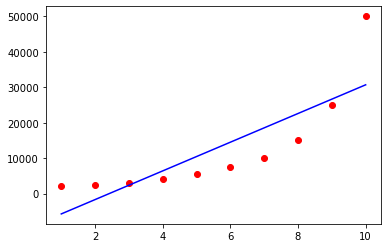

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


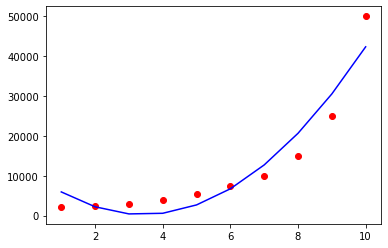

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


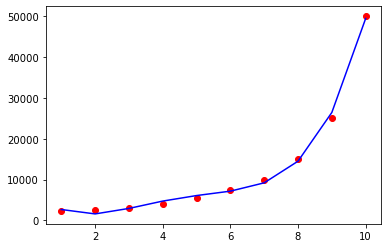

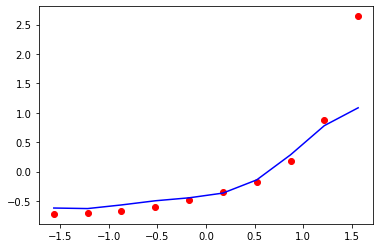

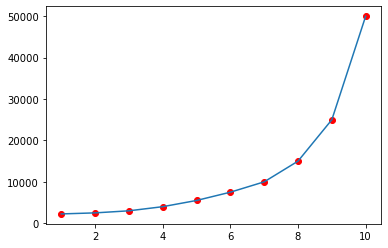

[10500.]


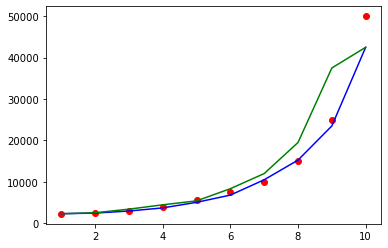

"#R2 METHODU\nfrom sklearn.metrics import r2_score\nprint('random forest R2 değeri')\nprint(r2_score(Y, rf_reg.predict(X)))# y değerleri, ve x değerlerini al bi tahmin yap dediğim predict fonksiyonu \nprint(r2_score(Y, rf_reg.predict(Z)))\n"

In [4]:
#1.kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# veri yukleme
veriler = pd.read_csv('maaslar.csv')

x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
X = x.values
Y = y.values


#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')
plt.show()
'''
print('linear regression r2 score sonucu') 
print(r2_score(Y, lin_reg.predict(X)))
'''



#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()
#tahminler
'''
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))

print('polynomial regression r2 score sonucu') 
print(r2_score(Y,lin_reg2.predict(poly_reg.fit_transform(X))))

'''
#verilerin olceklenmesi
#standart scaler 
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X)

sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))#! Y nin shapesini bilmiyorum ben, sen bana öyle bir ayarla ki y esneninde bir tane column olsun, arraydeki üye sayısı kadar da index olsun 


#SRV REGRESSION  h
from sklearn.svm import SVR #lineerde önce bir regresyon tanımlıyorduk. ardından fit ettirip devam ediyorduk aynı mantık

svr_reg = SVR(kernel='rbf')#kernel parametresi önemli 
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red') # unuttuysan bu kodu bi internete bak 
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue') #x ölçekli ve 
#plt.plot(x_olcekli,y_olcekli ,color='blue') # neden değil sorusunun cevabı scatter fonksiyonunda hahha 
plt.show() # göster diyorum ve diğer bir plot çizmeye başladığımda problem karışma vs olmayacak 

'''
print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))
print('SVR r2 score Sonucu')
print(r2_score(y_olcekli,svr_reg.predict(x_olcekli)))
'''
#DECISION TREE REGRESSION 
from sklearn.tree import DecisionTreeRegressor
#r_dt = decision tree regressor 
r_dt = DecisionTreeRegressor(random_state=0) # object tanımlanırken kullandığımız bir parametre  
r_dt.fit(X,Y)#BÜYÜK X DEN Y Yİ ÖĞREN 

plt.scatter(X,Y,color = 'r')
plt.plot(X, r_dt.predict(X))
plt.show() 
'''
print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))
print('decision tree r2 score') # sonucun 1 çıkmasının nedeni regresyon türünün decision tree olması 
print(r2_score(Y,r_dt.predict(X)))
'''


#ensemble learning ==> RANDOM FOREST REGRESSİON   
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0,n_estimators=10) 
#n_estimators->kaç adet decision tree çizeceğini söylüyoruz 
rf_reg.fit(X, Y.ravel())

print(rf_reg.predict([[6.6]])) #decision tree 10000(maaslardaki değerler) değerini döndürdü, ancak forest asla ve asla o değerin aynısını dönürmeyecektir.
#bu arada forest, sınıflandırmada decision tree gibi bir sonuç dönücek çünkü mevcut etiketlerin dışına çıkamaz.  
plt.scatter(X,Y,color= 'r')
plt.plot(X, rf_reg.predict(X), color='b')

Z = X + 0.5 
plt.plot(X, rf_reg.predict(Z), color='green')
#random forestların sonuçları decision treeden farklı çalışıyor. 
plt.show()


'''#R2 METHODU
from sklearn.metrics import r2_score
print('random forest R2 değeri')
print(r2_score(Y, rf_reg.predict(X)))# y değerleri, ve x değerlerini al bi tahmin yap dediğim predict fonksiyonu 
print(r2_score(Y, rf_reg.predict(Z)))
''' 






















